In [1]:
'''
About dataset:
- There are 20 videos.
- Comprised of different types of youtube videos on various computer science topics.
- Videos range from 7 mins to 38 mins in duration, with a total duration of 5.2 hours.
- There are 338 question-answer details.
- 75% of the answers are 12 seconds and less in length
- Deviation from actual start-time of answers when start of the video is taken as the predicted start-time:
    - Average of 349s or 36.2% of video, 
    - Average of 231s or 26.9% of video, ignoring 20% of outliers
'''
''''''

''

In [2]:
import pandas as pd
from utils import showAvgPlots

In [3]:
dset = pd.read_csv('../yt-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../yt-dset-vid-details.csv')

In [4]:
#Video-Count #Duration Details
print('No. of videos:', len(dsetDetails))
print('Total duration:', f"{round(sum(dsetDetails['Duration'])/3600, 2)} Hours")
print('Duration Details (in Min):')
print(dsetDetails['Duration'].map(lambda x: x/60).describe())


No. of videos: 20
Total duration: 5.2 Hours
Duration Details (in Min):
count    20.000000
mean     15.602500
std       7.946803
min       7.516667
25%      10.179167
50%      13.816667
75%      17.404167
max      38.316667
Name: Duration, dtype: float64


Questions-dataset details

In [5]:
dset.head()

,Video_ID,Question,Answer,Start_timestamp,End_timestamp
0,101,What is Kubernetes?,kubernetes is an open source container orchest...,64,98
1,101,Who developed Kubernetes?,Google,69,70
2,101,Who created Kubernetes?,Google,69,70
3,101,What is the job of controller manager in Kuber...,controller manager which basically keeps an ov...,321,332
4,101,What is the job of scheduler in Kubernetes?,scheduler which is basically responsible for s...,336,360


In [6]:
print('No. of questions: ', len(dset))

No. of questions:  338


In [7]:
temp = dset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')
print("Answers duration details (in Sec): ")
print((temp["End_timestamp"]-temp["Start_timestamp"]).describe())

Answers duration details (in Sec): 
count    338.000000
mean      10.514793
std       10.833297
min        0.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       70.000000
dtype: float64


100% Mean: 36.17
80% Mean: 26.93


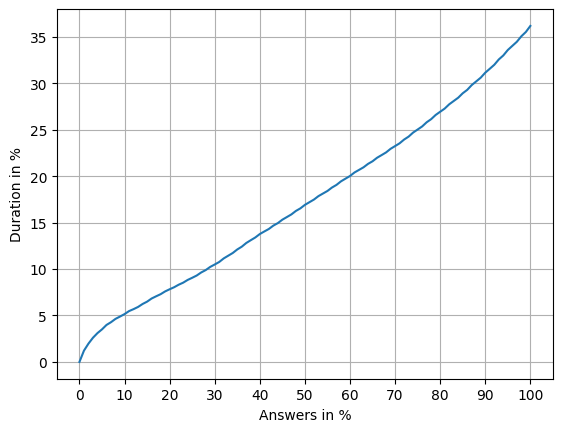

100% Mean: 349.06
80% Mean: 230.74


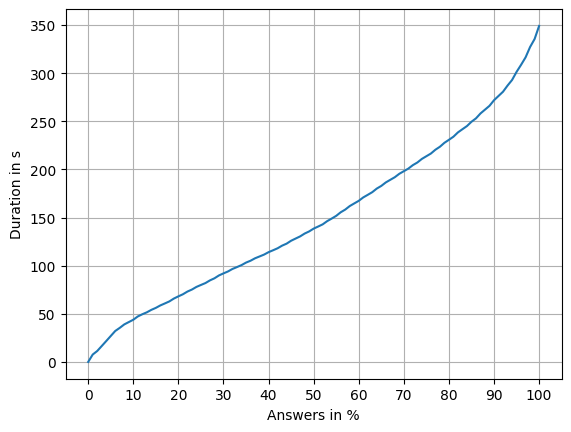

In [8]:
errs = list((temp['Start_timestamp']*100)/temp['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(temp['Start_timestamp'])
showAvgPlots(errs, ylabel='Duration in s')

In [9]:
#Shows average deviation of actual start point of answers from choosen start point in both seconds and percentage.
#Average deviation vs Best X% answers ie ignoring (100-X)% as outliers